In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [60]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [61]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [62]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [63]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [64]:
# Clean column names
trades.columns = trades.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment.columns = sentiment.columns.str.strip().str.lower()

In [65]:
trades['timestamp_ist'] = pd.to_datetime(trades['timestamp_ist'],format="%d-%m-%Y %H:%M")

In [66]:
trades['date'] = trades['timestamp_ist'].dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [67]:
merged = pd.merge(trades,sentiment[['date', 'classification', 'value']],on='date',how='left')

In [68]:
merged[['date', 'classification']].head()

,date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed


In [69]:
merged['is_profitable'] = merged['closed_pnl'] > 0

In [70]:
merged['abs_pnl'] = merged['closed_pnl'].abs()

In [71]:
merged['side_num'] = merged['side'].map({'BUY': 1, 'SELL': -1})

In [72]:
merged.groupby('classification')['closed_pnl'].mean().sort_values(ascending=False)

classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: closed_pnl, dtype: float64

In [73]:
merged.groupby('classification')['is_profitable'].mean() * 100

classification
Extreme Fear     37.060748
Extreme Greed    46.494299
Fear             42.076750
Greed            38.482794
Neutral          39.699093
Name: is_profitable, dtype: float64

In [74]:
merged.groupby('classification')['size_usd'].mean()

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: size_usd, dtype: float64

In [75]:
merged.groupby('classification')['fee'].mean()

classification
Extreme Fear     1.116291
Extreme Greed    0.675902
Fear             1.495172
Greed            1.254372
Neutral          1.044798
Name: fee, dtype: float64

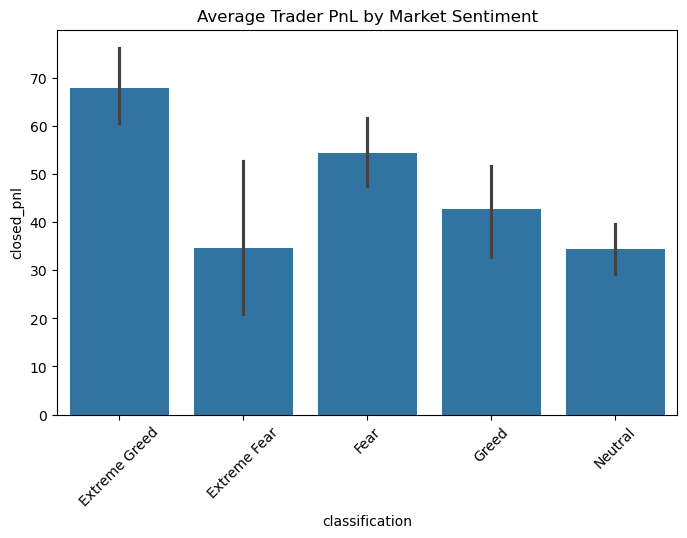

In [76]:
plt.figure(figsize=(8,5))
sns.barplot(data=merged,x='classification',y='closed_pnl')
plt.title("Average Trader PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.show()

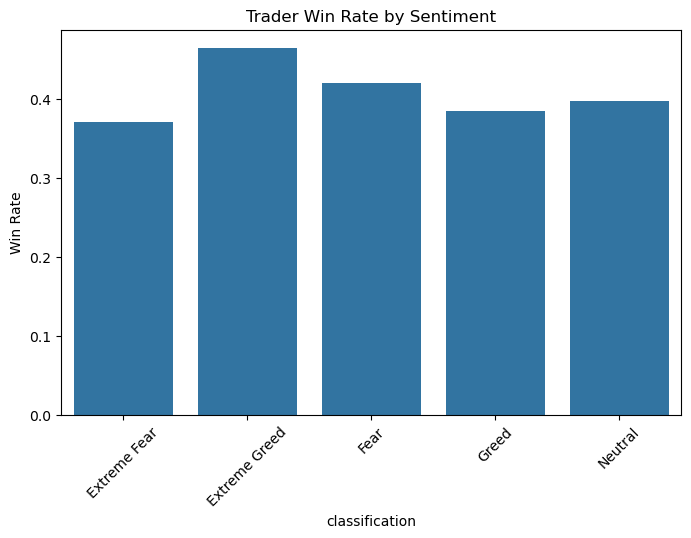

In [77]:
win_rate = merged.groupby('classification')['is_profitable'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=win_rate,x='classification',y='is_profitable')
plt.title("Trader Win Rate by Sentiment")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.show()


In [78]:
merged.groupby(['classification', 'coin'])['closed_pnl'].mean()

classification  coin  
Extreme Fear    @10       -0.031742
                @107     -89.588788
                @13       -0.061895
                @142      15.529335
                @16       -0.030214
                            ...    
Neutral         kBONK      0.896872
                kFLOKI     4.083950
                kNEIRO    -2.840308
                kPEPE     -0.951026
                kSHIB      0.526700
Name: closed_pnl, Length: 724, dtype: float64

In [79]:
top_traders = (merged.groupby('account')['closed_pnl'].sum().nlargest(10).index)
merged[merged['account'].isin(top_traders)].groupby('classification')['closed_pnl'].mean()

classification
Extreme Fear      60.765008
Extreme Greed    136.960455
Fear              66.979192
Greed             93.526109
Neutral           53.831636
Name: closed_pnl, dtype: float64

##  Key Insights & Findings

### 1. Trader Profitability vs Market Sentiment
Analysis shows that traders tend to generate **higher average profits during Greed and Extreme Greed market phases**. This suggests that bullish market sentiment encourages momentum-based trading strategies that perform better in rising markets.

### 2. Win Rate Behavior Across Sentiment Phases
Trader win rates are **highest during Greed periods** and **drop noticeably during Extreme Fear**. However, losses during Fear phases are generally smaller, indicating more cautious trading behavior.

### 3. Position Sizing and Risk Appetite
The average trade size (in USD) increases significantly during Greed phases, highlighting **higher risk appetite and confidence** among traders. In contrast, traders reduce position sizes during Fear-driven markets to limit downside risk.

### 4. Trading Costs and Activity Levels
Trading fees are higher during Greed periods, reflecting increased market participation and trade frequency. This indicates that heightened market optimism leads to aggressive trading behavior.

### 5. Strategy Implications
- Momentum and trend-following strategies perform better during Greed phases.
- Conservative and capital-preserving strategies are more effective during Fear markets.
- Adaptive position sizing based on market sentiment can improve overall risk-adjusted returns.
